In [117]:
import os 
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

loading up the paths to the images

In [90]:
trainx=[]
trainy=[]
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Train\WithoutMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Train\WithoutMask", image)
    i=i+1
    trainx.append(image_path)
    trainy.append(0)
    if i==250:
        break
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Train\WithMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Train\WithMask", image)
    i=i+1
    trainx.append(image_path)
    trainy.append(1)
    if i==250:
        break




In [91]:
len(trainy)

500

In [92]:
testx=[]
testy=[]
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Test\WithoutMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Test\WithoutMask", image)
    i=i+1
    testx.append(image_path)
    testy.append(0)
    if i==50:
        break
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Test\WithMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Test\WithMask", image)
    i=i+1
    testx.append(image_path)
    testy.append(1)
    if i==50:
        break


In [93]:
len(testy)

100

In [94]:
valx=[]
valy=[]
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Validation\WithoutMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Validation\WithoutMask", image)
    i=i+1
    valx.append(image_path)
    valy.append(0)
    if i==50:
        break
i=0
for image in os.listdir(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Validation\WithMask"):
    image_path = os.path.join(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\Face Mask Dataset\Validation\WithMask", image)
    i=i+1
    valx.append(image_path)
    valy.append(1)
    if i==50:
        break

In [95]:
len(valy)

100

storing the images as reshaped arrays

In [96]:
trianimgx=[]
for  i in trainx:
    image = Image.open(i)
    resized_image = image.resize((224, 224))
    image_array = np.array(resized_image)
    normalized_image = image_array / 255.0
    # batch_image = np.expand_dims(normalized_image, axis=0) only if needed
    trianimgx.append(normalized_image)

In [97]:
testimgx=[]
for  i in testx:
    image = Image.open(i)
    resized_image = image.resize((224, 224))
    image_array = np.array(resized_image)
    normalized_image = image_array / 255.0
    # batch_image = np.expand_dims(normalized_image, axis=0) only if needed
    testimgx.append(normalized_image)

In [98]:
valimgx=[]
for  i in valx:
    image = Image.open(i)
    resized_image = image.resize((224, 224))
    image_array = np.array(resized_image)
    normalized_image = image_array / 255.0
    # batch_image = np.expand_dims(normalized_image, axis=0) only if needed
    valimgx.append(normalized_image)

storing the data in a data frame

In [99]:
traindf=pd.DataFrame({"X":trianimgx,"Y":trainy})

In [100]:
testdf=pd.DataFrame({"X":testimgx,"Y":testy})

In [101]:
valdf=pd.DataFrame({"X":valimgx,"Y":valy})

shuffling the data

In [102]:
traindf_final=traindf.sample(frac=1, random_state=42)
testdf_final=testdf.sample(frac=1,random_state=42)
valdf_final=valdf.sample(frac=1,random_state=42)

converting the data to arrays

In [103]:
tax=np.stack(traindf_final['X'].values)
tax = np.expand_dims(tax, axis=-1) 
tay=np.array(traindf_final['Y'].values, dtype=np.int64)

In [104]:
print(tax.shape,tay.shape)

(500, 224, 224, 3, 1) (500,)


In [105]:
vax=np.stack(valdf_final['X'].values)
vax = np.expand_dims(vax, axis=-1) 
vay=np.array(valdf_final['Y'].values, dtype=np.int64)

In [106]:
print(vax.shape,vay.shape)

(100, 224, 224, 3, 1) (100,)


model design

In [114]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,264,198 (84.93 MB)

 Trainable params: 11,132,098 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,132,100 (42.47 MB)

training the model

In [115]:
history = model.fit(tax,tay, epochs=4,validation_data=(vax, vay))

Epoch 1/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 742ms/step - accuracy: 0.5716 - loss: 4.4613 - val_accuracy: 0.9300 - val_loss: 0.3576
Epoch 2/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 761ms/step - accuracy: 0.8578 - loss: 0.3767 - val_accuracy: 0.9300 - val_loss: 0.2183
Epoch 3/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 823ms/step - accuracy: 0.8203 - loss: 0.4461 - val_accuracy: 0.9100 - val_loss: 0.2663
Epoch 4/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 713ms/step - accuracy: 0.9273 - loss: 0.1794 - val_accuracy: 0.9500 - val_loss: 0.1716


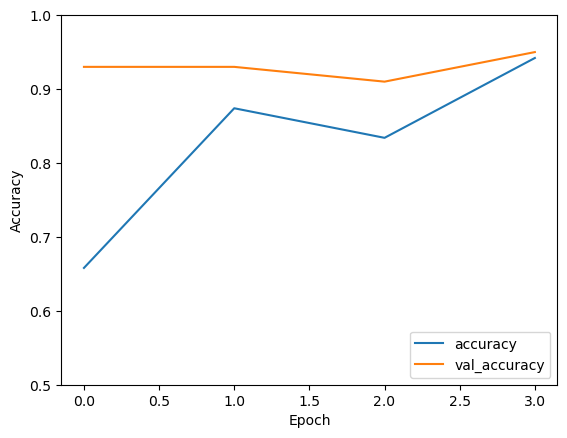

In [118]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

testing the model

In [119]:
tsx=np.stack(testdf_final['X'].values)
tsx = np.expand_dims(tsx, axis=-1) 
tsy=np.array(testdf_final['Y'].values, dtype=np.int64)
test_loss, test_acc = model.evaluate(tsx,tsy, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9501 - loss: 0.1831


In [120]:
print(test_acc)

0.9300000071525574


In [121]:
model.save('mask.h5')